In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Experimentos


#### Generando Data frame

In [20]:
df_concurrente_con_rep_12800 = pd.read_csv("../output/experimento1/con_concurrencia/salida-conRepetidos-12800.txt.csv");
df_concurrente_con_rep_25600 = pd.read_csv("../output/experimento1/con_concurrencia/salida-conRepetidos-25600.txt.csv");
df_concurrente_con_rep_51200 = pd.read_csv("../output/experimento1/con_concurrencia/salida-conRepetidos-51200.txt.csv");


df_secuencial_con_rep_12800 = pd.read_csv("../output/experimento1/sin_concurrencia/salida-conRepetidos-12800.txt.csv");
df_secuencial_con_rep_25600 = pd.read_csv("../output/experimento1/sin_concurrencia/salida-conRepetidos-25600.txt.csv");
df_secuencial_con_rep_51200 = pd.read_csv("../output/experimento1/sin_concurrencia/salida-conRepetidos-51200.txt.csv");

#Agregando columna de metodos
metodo_maximo = []
metodo_maximo_paralelo = []
for i in range(0,26):
    metodo_maximo.append('max')
    metodo_maximo_paralelo.append('max_par')
#Agregando columna de tamaños
tamaño1 = []
tamaño2 = []
tamaño3 = []
for i in range(0,26):
    tamaño1.append('12800')
    tamaño2.append('25600')
    tamaño3.append('51200')



df_concurrente_con_rep_12800['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_12800['size'] = tamaño1
df_concurrente_con_rep_25600['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_25600['size'] = tamaño2
df_concurrente_con_rep_51200['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_51200['size'] = tamaño3
df_secuencial_con_rep_12800['metodo'] = metodo_maximo
df_secuencial_con_rep_12800['size'] = tamaño1
df_secuencial_con_rep_25600['metodo'] = metodo_maximo
df_secuencial_con_rep_25600['size'] = tamaño2
df_secuencial_con_rep_51200['metodo'] = metodo_maximo
df_secuencial_con_rep_51200['size'] = tamaño3
#print(df_concurrente_con_rep_12800)
#print(df_secuencial_con_rep_12800)

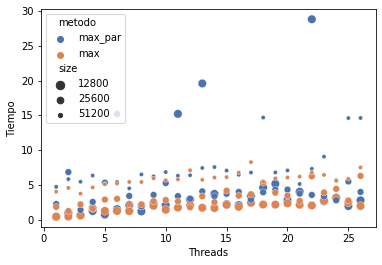

In [21]:
df_comparciones = pd.concat([df_concurrente_con_rep_12800, df_secuencial_con_rep_12800,df_concurrente_con_rep_25600,df_secuencial_con_rep_25600,df_concurrente_con_rep_51200,df_secuencial_con_rep_51200])
fig = sns.scatterplot(data=df_comparciones, x='thread_maximo', y='tiempo_mediana',palette="deep", hue='metodo',size="size");
fig.set(xlabel='Threads', ylabel='Tiempo');
plt.savefig("12800.svg");

### Experimento 1: Maximo Concurrente vs Maximo Secuencial

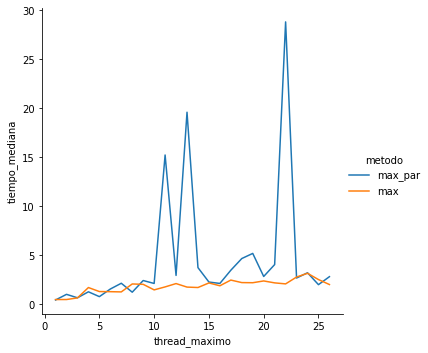

In [22]:
df_12800 = pd.concat([df_concurrente_con_rep_12800, df_secuencial_con_rep_12800], axis=0, ignore_index=True)
sns.relplot(data=df_12800 ,x="thread_maximo", y="tiempo_mediana",hue="metodo", kind="line")
plt.show()

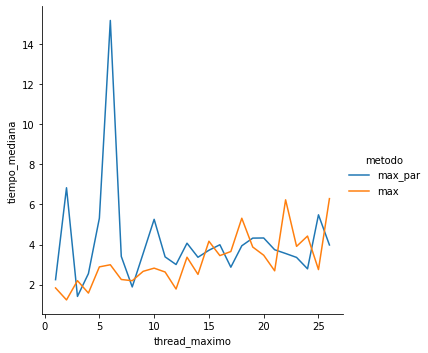

In [18]:
df_25600 = pd.concat([df_concurrente_con_rep_25600, df_secuencial_con_rep_25600], axis=0, ignore_index=True)
sns.relplot(data=df_25600 ,x="thread_maximo", y="tiempo_mediana", kind="line",hue="metodo")
plt.show()

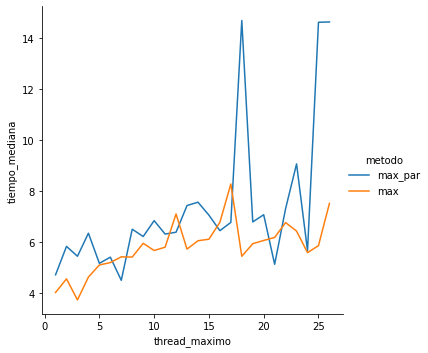

In [23]:
df_51200 = pd.concat([df_concurrente_con_rep_51200, df_secuencial_con_rep_51200], axis=0, ignore_index=True)
sns.relplot(data=df_51200 ,x="thread_maximo", y="tiempo_mediana", kind="line",hue="metodo")
plt.show()

### Experimento 2: CargadeArchivosParalelo vs CargaDeArchivos Secuencial

En este experimento vamos a evaluar el tiempo de ejecución que tomara la carga de archivos.

Tanto de manera secuencial como de manera paralela.

In [30]:
df_salida_sin_concurrencia = pd.read_csv("../output/experimento2/lectura_con_concurrencia/salida-threads-lectura-con-concurrencia.csv");
df_salida_con_concurrencia = pd.read_csv("../output/experimento2/lectura_sin_concurrencia/salida-threads-lectura-sin-concurrencia.csv");

In [33]:
df_salida_sin_concurrencia.head()

,threads_lectura,thread_maximo,tiempo,output
0,1,1,1.13368,a6Dp3=19
1,2,2,1.25988,a6Dp3=19
2,3,3,4.90426,aZVek=19
3,4,4,8.05027,aZBC6=19
4,5,5,13.00670,axf6c=19


In [34]:
df_salida_con_concurrencia.head()

,threads_lectura,thread_maximo,tiempo,output
0,1,1,0.092863,a6Dp3=19
1,2,2,0.127864,a6Dp3=19
2,3,3,0.128295,aZVek=19
3,4,4,0.197464,aZBC6=19
4,5,5,0.210862,axf6c=19


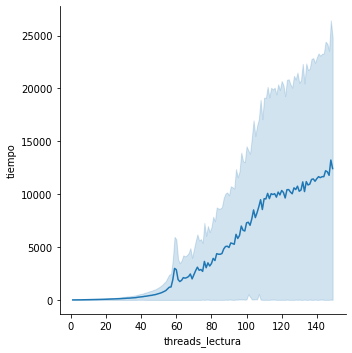

In [35]:
df_salida = pd.concat([df_salida_con_concurrencia, df_salida_sin_concurrencia], axis=0, ignore_index=True)
sns.relplot(data=df_salida ,x="threads_lectura", y="tiempo", kind="line")
plt.show()